In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels .api as sm
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/becca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/becca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/becca/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
df_reviews_amazon = pd.read_csv('Reviews.csv')

In [6]:
df_reviews_amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
print(df_reviews_amazon.shape)

(568454, 10)


## Pre processing 

### Text Cleaning

#### Remove stop words, punctuation, and convert text to lowercase.

In [11]:
df_text = df_reviews_amazon[['Text']]
df_text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [12]:
# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', punctuation))
    # Remove stop words
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

# Apply cleaning function to the dataset
df_reviews_amazon['cleaned_text'] = df_reviews_amazon['Text'].apply(clean_text)

df_reviews_amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


#### Tokenization and lemmatization to standardize words

In [14]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to tokenize and lemmatize
def tokenize_and_lemmatize(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())  # Convert to lowercase before processing
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Join back into a string
    return " ".join(lemmatized_tokens)

# Apply the function to the Text column
df_reviews_amazon['cleaned_text'] = df_reviews_amazon['cleaned_text'].apply(tokenize_and_lemmatize)
df_reviews_amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


### Feature Extraction

#### Use TF-IDF (Term Frequency-Inverse Document Frequency) to convert text into numerical features.
#### Alternatively, use pre-trained embeddings like Word2Vec, GloVe, or BERT embeddings for richer representations.

TF-IDF is a statistical measure to evaluate the importance of a word in a document relative to a collection of documents.

In [18]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=700)

# Fit and transform the text column
tfidf_matrix = tfidf_vectorizer.fit_transform(df_reviews_amazon['cleaned_text'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head()

,10,100,12,15,20,30,50,able,absolutely,acid,...,worth,would,wouldnt,wrong,year,yes,yet,youll,youre,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250584
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.443654


GloVe 

In [20]:
# Load GloVe embeddings
def load_glove(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load the embeddings (replace with your path)
glove_embeddings = load_glove("glove.6B.300d.txt")

# Function to get sentence embedding
def sentence_to_embedding(sentence, embeddings, embedding_dim=300):
    tokens = sentence.lower().split()
    vectors = [embeddings[word] for word in tokens if word in embeddings]
    if vectors:
        return np.mean(vectors, axis=0)  # Average word vectors
    else:
        return np.zeros(embedding_dim)  # Return zeros if no words are found

# Apply to DataFrame
df_reviews_amazon['embedding'] = df_reviews_amazon['cleaned_text'].apply(lambda x: sentence_to_embedding(x, glove_embeddings))

df_reviews_amazon.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_text,embedding
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...,"[-0.02314483, 0.33303013, 0.024921125, -0.1657..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...,"[-0.052882116, 0.35359454, -0.020453759, -0.20..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...,"[-0.12456827, 0.0035645277, -0.046975113, -0.1..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...,"[-0.13305135, 0.253912, -0.05810176, -0.218029..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...,"[0.10695776, -0.0075897677, 0.01912454, -0.103..."


### Check the Score Distribution

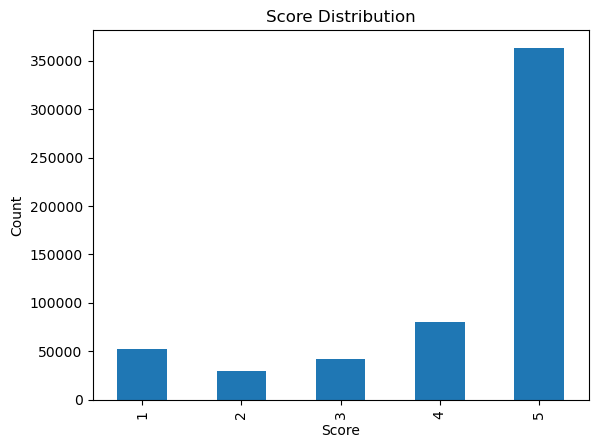

In [22]:
df_reviews_amazon['Score'].value_counts().sort_index().plot(kind='bar')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

### Sentiment based on the Score Column, if Score >= 4 Positive and if Score <4 Negative

Sentiment
1    443777
0    124677
Name: count, dtype: int64


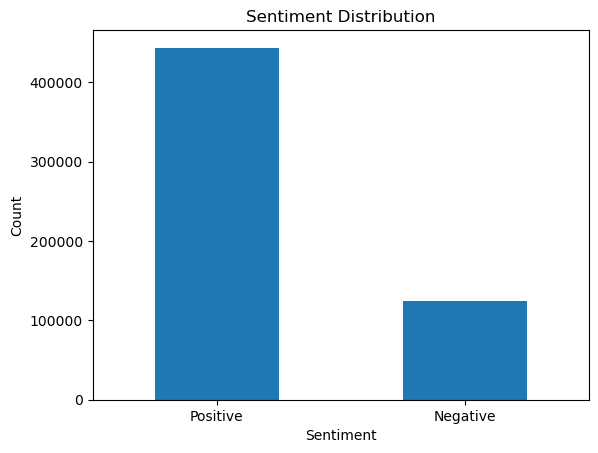

In [24]:
df_reviews_amazon['Sentiment'] = (df_reviews_amazon['Score'] >= 4).astype(int)
print(df_reviews_amazon['Sentiment'].value_counts())
df_reviews_amazon['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Positive', 'Negative'], rotation=0)
plt.show()


### Combine Features (GLOVE Embeddings, Numerical features (Score,HelpfulnessNumerator,HelpfulnessDenominator) and TFIDF)

In [26]:
# Convert the GloVe embeddings into a 2D NumPy array
glove_matrix = np.array(df_reviews_amazon['embedding'].tolist())
print(glove_matrix.shape)  # (rows, embedding_dim)

(568454, 300)


In [27]:
numerical_features = df_reviews_amazon[['Score', 'HelpfulnessNumerator', 'HelpfulnessDenominator']].values
print(numerical_features.shape)  # (rows, num_features)

(568454, 3)


In [28]:
print(tfidf_df.shape)  # Should be (568454, 700)
print(glove_matrix.shape)  # Check if it's (568454, embedding_dim)
print(numerical_features.shape)  # Check if it's (568454, num_features)


(568454, 700)
(568454, 300)
(568454, 3)


In [29]:
tfidf_dense = tfidf_df.values
combined_features = np.hstack([tfidf_dense, glove_matrix, numerical_features])
print(combined_features.shape)  # Should be (rows, total_features)

(568454, 1003)


In [30]:
y = df_reviews_amazon['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(combined_features, y, test_size=0.2, random_state=42)

# Train a model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate
print("Model Accuracy:", clf.score(X_test, y_test))


Model Accuracy: 0.9999912042290067


Model overfitted, the accuracy its near 100%. Next code its to check.

In [32]:
print("Training Accuracy:", clf.score(X_train, y_train))
print("Test Accuracy:", clf.score(X_test, y_test))

Training Accuracy: 1.0
Test Accuracy: 0.9999912042290067
